Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
import cv2
from vae.vae import ConvVAE, reset_graph
import matplotlib.animation as animation

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "tf_vae"

z_size=64#32

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs1 = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs1.astype(np.float32)

In [6]:
obs.shape

(200, 128, 128, 3)

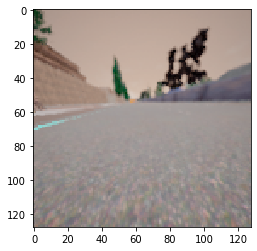

In [7]:
#frame = random.choice(obs).reshape(1, 64, 64, 3)
#frame = random.choice(obs).reshape(1, 128, 128, 3)
frame = random.choice(obs)
image = frame/255
image = image.reshape(1, 128, 128, 3)
plt.imshow(image[0])
plt.show()
#frame = np.random.randint(255, size=(128,128,3),dtype=np.uint8).reshape(1, 128, 128, 3)

In [8]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


[159.716  149.9367 146.6733]


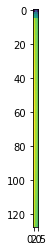

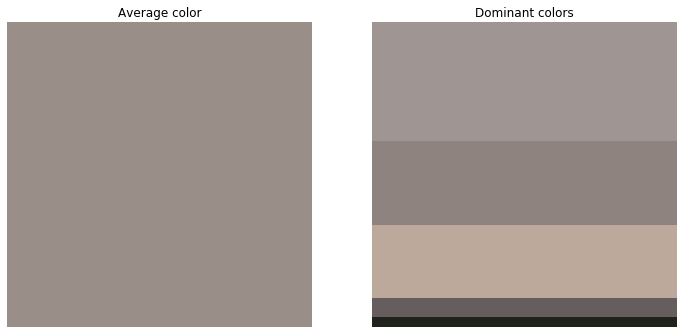

In [9]:
# show recorded frame that will be fed into the input of VAE
#frame = frame - np.mean(frame, axis=(0, 1))
img = frame
average = img.mean(axis=0).mean(axis=0)
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
dominant = palette[np.argmax(counts)]
print(dominant)
plt.imshow(frame[0])
plt.show()

avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

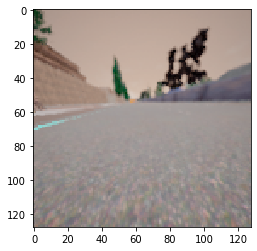

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


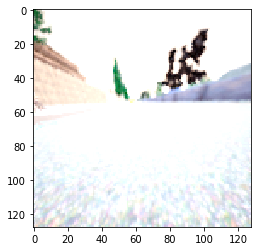

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


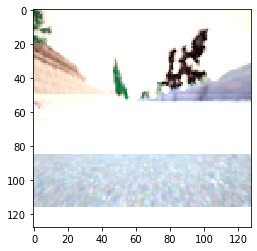

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


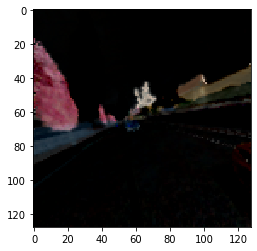

In [10]:
dom = dom_patch/255
dom = dom.reshape(1, 128, 128, 3)

avg = avg_patch/255
avg = avg.reshape(1, 128, 128, 3)

#plt.imshow(dom[0])
#plt.show()

plt.imshow(image[0])
plt.show()

#altered = image/dom
altered_avg = image/avg
plt.imshow(altered_avg[0])
plt.show()

altered_dom = image/dom
plt.imshow(altered_dom[0])
plt.show()

img1 = obs[0].reshape(1, 128, 128, 3)
img2 = obs[30].reshape(1, 128, 128, 3)

img3 = img1[0] - img2[0]
plt.imshow(img3/255)
plt.show()

#batch_z = vae.encode(frame)

In [11]:
print(batch_z[0]) # print out sampled z
#print(batch_z.shape)
b_z = np.copy(batch_z)
print(b_z[0])
reconstruct = vae.decode(batch_z)
reconstruct2 = vae.decode(b_z)
plt.imshow(batch_z)
plt.show()
plt.imshow(b_z)
plt.show()
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()
plt.imshow(reconstruct2[0])
plt.show()

NameError: name 'batch_z' is not defined

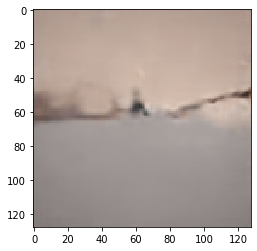

In [70]:
# show reconstruction
#plt.imshow(reconstruct[0])
#plt.show()
b_z = np.copy(batch_z)
for i in range(0,32):
    b_z[0][i] += -1
reconstruct2 = vae.decode(b_z)
plt.imshow(reconstruct2[0])
plt.show()